### YoLo -> You Only Look Once
- YOLO is a state-of-the-art, real-time object detection system.
- YOLO is a clever neural network for doing object detection in real-time.
- YOLO is extremely fast and accurate.
- Invented in 2015

- In CNN, FastRCNN, RCNN etc it majorly focuses on creating bounding box first and then predicting or classifying into classes, it has drawbacks like :
    - It is slow
    - It is not end-to-end
    - It is multistage approach
    - each component trained separately
- ***Idea of Yolo is that it is a single stage approach that is reframing object detection as a single stage regression problem***

#### **Steps of Yolo V1**
- Take Input Image
- Resize into 448*448(number is fixed on basis of model architecture, currently YoLo V1)
- Divide image into S*S grid (usualy 7 in V1)
- each cell is responsible for predicting one object
- the cell where center of object falls into is responsible for detection

- BOUNDING BOXES
    - Box -> x,y axis and width, height, Eg: (200,311,120,250)
    - x: 200
    - y: 311
    - width: 142
    - height: 250

    - Calculations to  be done:
        - del x = (x-x')/64             x',y' -> coordinate of ledt top point of cell
        - del y = (y-y')/64             x,y -> center point coordinates
        - del w = w/448                 normalizing by dividing by 448
        - del h = h/448

    - Eg: 

    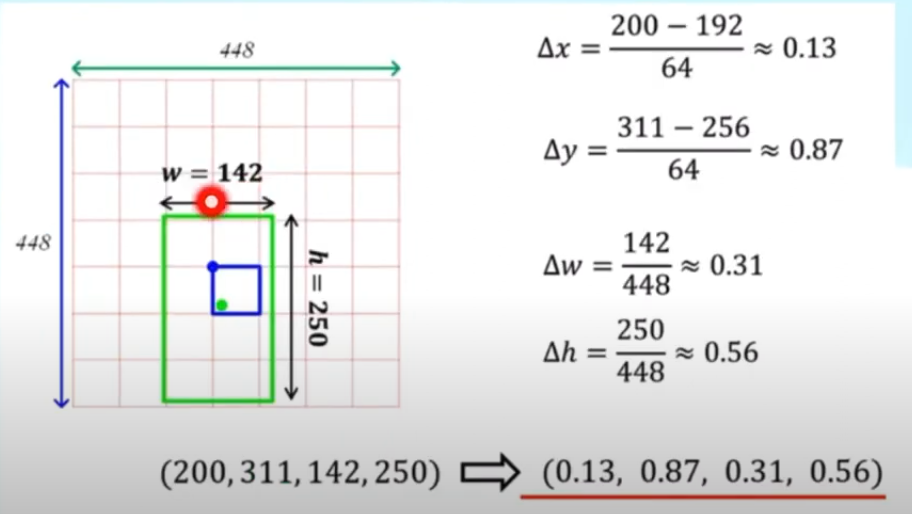

- For object score or confidence score -> 1 or 0
- For class prediction -> 20 classes in V1

- Understanding prediction vector:
    - each grid predicts:
        - 2 bounding boxes (B=2)
            - for each bounding box:
                - 5 predictions (x,y,w,h,confidence)
                - 20 class predictions
    - Total = S * S * (B*5+C) = 7 * 7 *(2*5+20) = 1470

- Output Parsing:
    - p comes out from the maximum of probability scores.
    - p is the probability of the class with the highest score.
    - confidence score: c1^ = c1 * p
    - confidence score: c2^ = c2 * p
    - confidence score: c^ = max(c1^,c2^)
        - if c^ > threshold, then object is detected
            - if object detected, then class is selected with highest score
            - then bounding box is selected with highest confidence score
            - then bounding box is drawn on image


                                        THIS IS HOW YOLO WORKS               


- Architecture of YoLo V1
    - Inspired by GoogleNet Model
    - 24 Convolutional Layers
    - 2 Fully Connected Layers
    - 1 Softmax Layer

    - 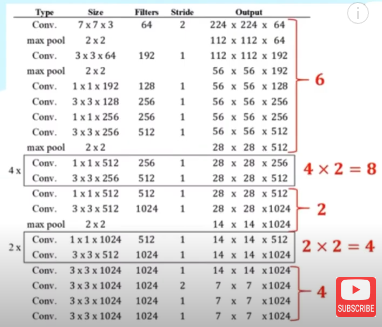

    - final layer : 7 * 7 * 1024 and on flattening to 50176 feature vector
    - pass through 2 fully connected layers
    - final layer is softmax layer
    - 1470 outputs (7 * 7 * (2*5+20))

- Training proces:
    - Dataset: Pascal VOC - 20 classes
    - network pretrained on imagenet at 224 * 224
    - actual training on 448 * 448 on voc dataset


- Loss Function:
    - Loss L is the sum of losses overall grid cels S * S
    - Put more imprtance on grid cells that contain objs and decrease for those having no object
    - L = L_cls + L_conf + L_box
    - L_box =  Objectness Loss ; L_conf :  Box regression loss ; L_cls : Classification loss
        - ALl 3 are sum of squared errors on predicted values to ground truth values
    - L' = Lambda * L 
    - Lambda = 5

    - Object Confidence Loss:
    - 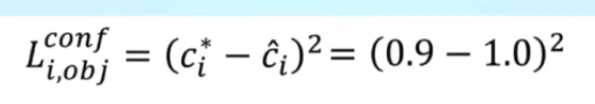
    
    - Classiciation Loss:
    - 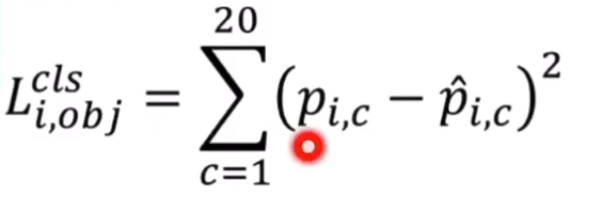



**FAST YOLO** -> 9 layers instead of 24, rest same.
- 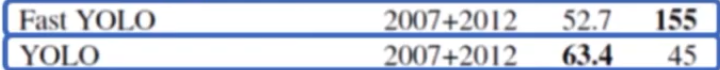


- Limitations of Yolo V1
    - max of 49 objects can be detected
    - localization errors i.e poor localization
    - background noise
    - difficulty in detecting small objects that appears in groups

#### **Yolo V2**

- Yolo V2 is a major improvement over Yolo V1
- Yolo V2 is a single stage object detector
- Yolo V2 is faster and more accurate than Yolo V1
- Yolo V2 is more generalizable and robust than Yolo V1
- Yolo V2 is a state-of-the-art object detector
    - 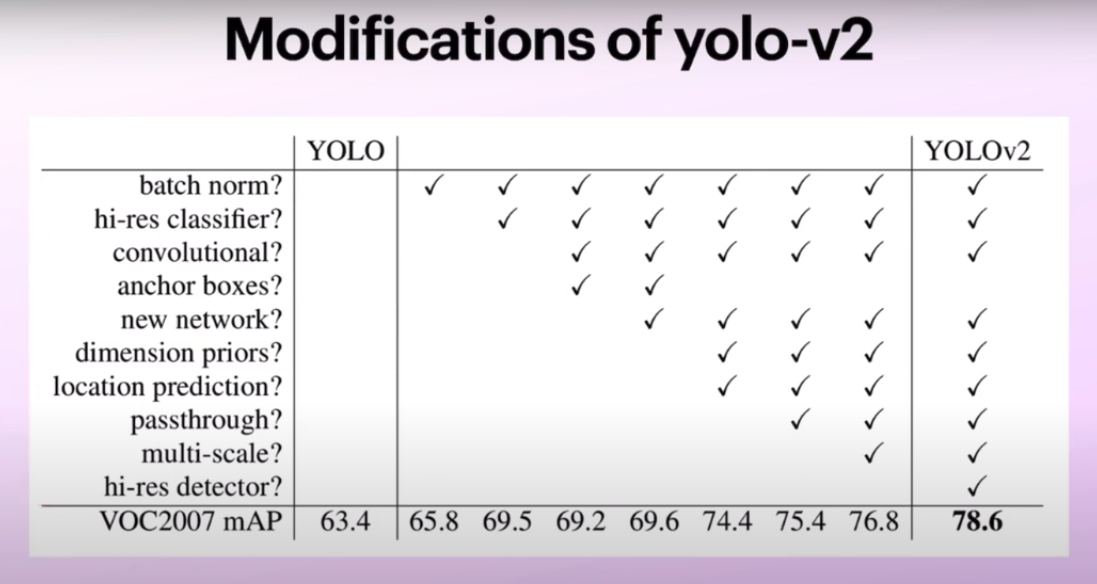
- Included Batch Normalization to all conv layers
- regularization effect - removed dropout layers
- High resolution classifier : 
   - 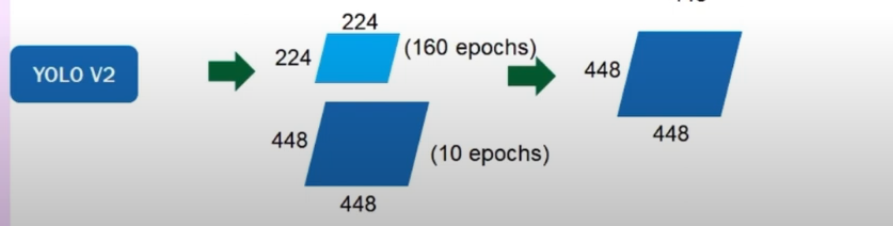
- In last layer before flattening -> instead of 7 * 7 * 1024 feature maps there are 14 * 14 * 1024 feature maps i.e for better localization
    - 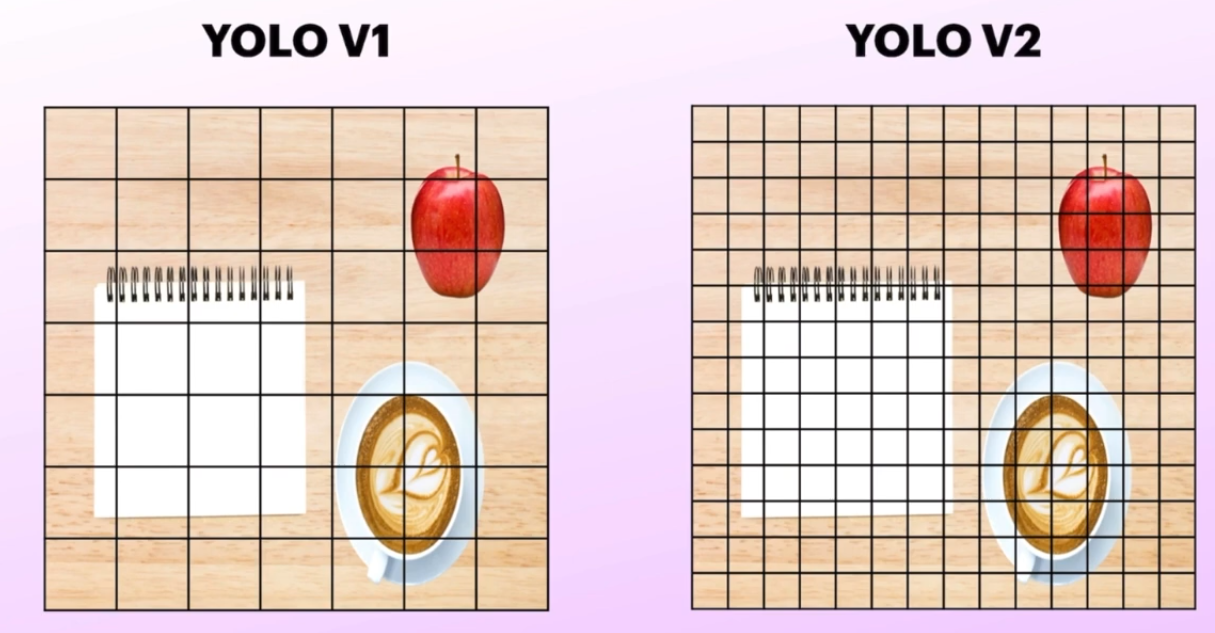
    - but even number is difficult so we reduce to 13 * 13
- Then there will be a pass through layer:
    - using a parallel branch and at the end concatenation of them:
    - 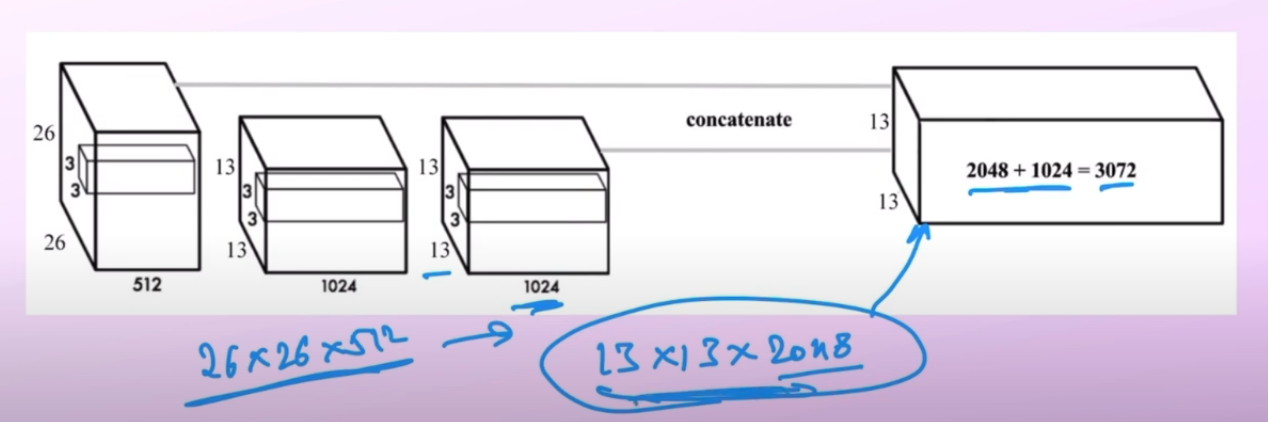
    

- Issues in bounding box with Yolo V1:
    - at max 2 boxes per grid cell -> 7 * 7 * 2 = 98 
    - if more than 2 objects in a grid cell, then it will be difficult to detect
    - main problem is  with fully connected layer

- Solved issue of bounding box by Yolo V2:
    - Instead of fully connected layer, it uses convolutional layer in last 2
    - hence yolo v2 is fully convolutional network
    - Solution: prediction of class per box

- Anchor Boxes: (solution for poor localization)
    - Highest IOU with groundtruth values
    - predefined set of shapes.
    - bounding box will  be relative to these anchors.
    - like in faster - RCNN it uses 9 anchor boxes at each location
    - Recall has improves from 81 to 88%
    - Measure of average precision decreased by 0.3% but **solution** for this is choosing anchors based on the dataset.
    - CLustering: Instead of predefined boxes, choose shapes depending on dataset and for this use k-means clustering for getting avg shapes and locations.
    - Image eg: 5 boxes are selected
    - 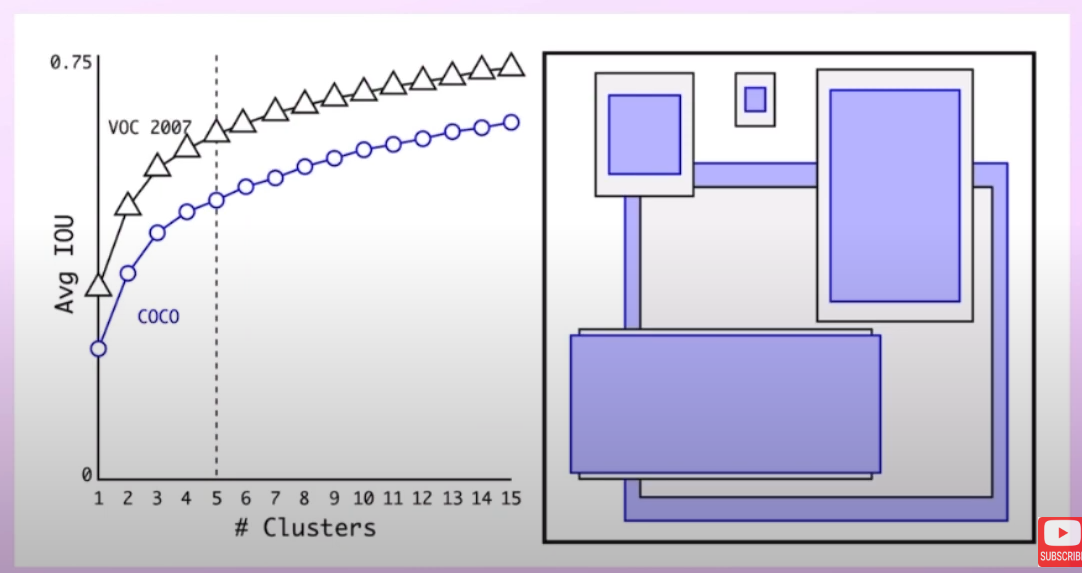
    - as 5 anchors in YoloV2 and 9 in Fast RCNN, yolo v2 reduces computation.

- Constrained Predictions:
    - Using sigmoid activation function on location coordinates x and y to get in range[0,1] -> tx, ty
    - Using exponential activation function on width and height to get positive values only in range  -> tw, th
    - helps in low loss and stable training than Yolo V1.

- After all solutions, now modified **Box Predictions** are:
    - for every grid  cell - 5 boxes predicted
    - each box has 5 predictions (tx, ty, tw, th, to)               |to: object confidence score|
    - each box has 20 class predictions
    - parameters per grid cell: (5 * (5 + 20)) = 125
    - total parameters: 13 * 13 * 125 = 21,725
    - **Yolo V2 is faster and more accurate than Yolo V1**
    - Best Output Comparision:
    - 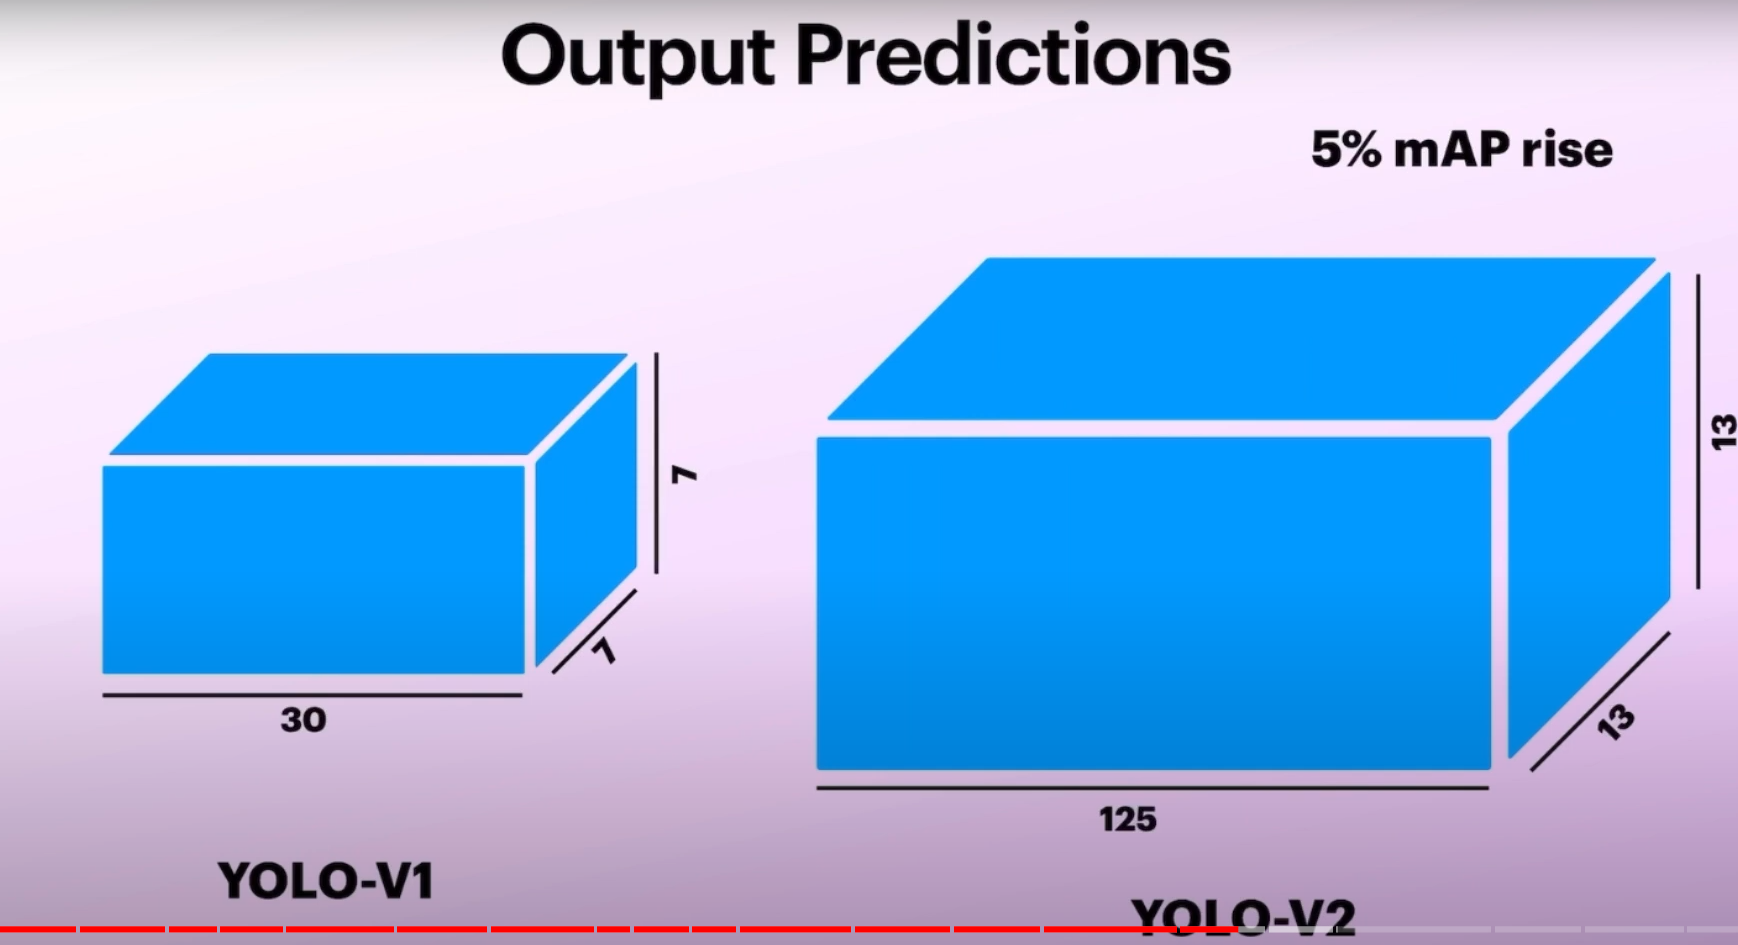
    - Target for class probabs using one-hot encoding vector.

- Loss Function:
    - 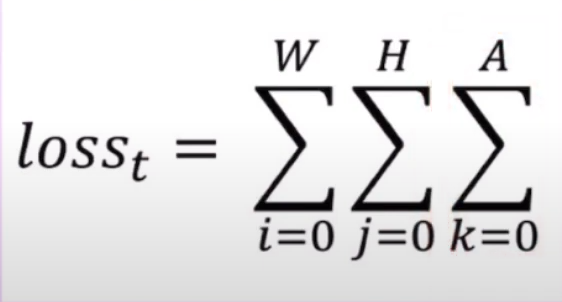
    - Extra parameter is of calculating loss of anchor box.

- Training:
    - Dataset: COCO dataset
    - n/w can accept any image resolution while testing
    - 160 epochs
    - 0.1 learning rate for first 100 epochs
    - 0.001 learning rate for next 60 epochs
    - 0.0001 learning rate for last 10 epochs
    - Batch size: 64
    - Momentum: 0.9
    - Weight decay: 0.0005
    - Dropout: 0.5
    - Image augmentation: random scaling and translations
    - Pretrained on ImageNet
    - low accuracy with high speed
        - on 288 * 288 image grid : 90 FPS with  69 mAP
        - on 544 * 544 image grid: 40 FPS with 78.6 mAP 
    - scale is randomly picked for every 10 batches in yolo v2.
    








    



